In [1]:
import json
import time

import numpy as np
import seaborn as sn

from classify import classify_subcategory

np.random.seed(0)

questions = open('tossups.json').readlines() + open('bonuses.json').readlines()
np.random.shuffle(questions)
questions = questions[:int(0.2*len(questions))]
print('Number of questions in test set:', len(questions))

with open('subcategories.txt') as f:
    SUBCATEGORIES = [line.strip() for line in f.readlines()]

Number of questions in test set: 47527


In [2]:
EPSILON = 0.00001

print('=====Begin Testing=====')
time_now = time.perf_counter()

counter = 0
correct = 0
confusion_matrix = [[0 for _ in range(len(SUBCATEGORIES))] for _ in range(len(SUBCATEGORIES))]

for line in questions:
    data = json.loads(line)

    if 'subcategory' not in data:
        continue

    subcategory = data['subcategory']

    if subcategory not in SUBCATEGORIES:
        continue

    counter += 1

    if data['type'] == 'tossup':
        prediction = classify_subcategory(data['question'] + ' ' + data['answer'], EPSILON)

    if data['type'] == 'bonus' and 'parts' in data and len(data['parts']) == 3:
        prediction = classify_subcategory(data['leadin'] + ' ' + ' '.join(data['parts']) + ' ' + ' '.join(data['answers']), EPSILON)

    subcategory_index = SUBCATEGORIES.index(subcategory)
    prediction_index = SUBCATEGORIES.index(prediction)

    confusion_matrix[subcategory_index][prediction_index] += 1

    if subcategory == prediction:
        correct += 1

    if counter % 10000 == 0:
        print(f'{correct}/{counter}')

print('=====End Testing=====')
print(f'Accuracy: {100 * correct / counter}% ({correct}/{counter})')
print(f'Time: {time.perf_counter() - time_now} seconds')

=====Begin Testing=====
8201/10000
16377/20000
24608/30000
32817/40000
=====End Testing=====
Accuracy: 82.17945945945947% (38008/46250)
Time: 27.567857799003832 seconds


In [3]:
for i, subcat in enumerate(SUBCATEGORIES):
    accuracy = 0.0 if sum(confusion_matrix[i]) == 0 else confusion_matrix[i][i] / sum(confusion_matrix[i])
    accuracy = round(100 * accuracy, 2)
    print(f'{subcat + ":":21} {str(confusion_matrix[i][i]) + "/" + str(sum(confusion_matrix[i])):10} ({accuracy}%)')

American Literature:  2396/3039  (78.84%)
British Literature:   2180/2540  (85.83%)
European Literature:  1633/1909  (85.54%)
World Literature:     1229/1464  (83.95%)
American History:     2467/3113  (79.25%)
Ancient History:      471/589    (79.97%)
European History:     2736/3626  (75.46%)
World History:        2068/2721  (76.0%)
Biology:              2239/2544  (88.01%)
Chemistry:            1848/2114  (87.42%)
Physics:              2282/2661  (85.76%)
Math:                 643/712    (90.31%)
Other Science:        1242/1721  (72.17%)
Visual Fine Arts:     2473/2883  (85.78%)
Auditory Fine Arts:   2254/2776  (81.2%)
Other Fine Arts:      885/1310   (67.56%)
Religion:             1673/1913  (87.45%)
Mythology:            2011/2305  (87.25%)
Philosophy:           1693/1903  (88.96%)
Social Science:       1424/1654  (86.09%)
Current Events:       250/403    (62.03%)
Geography:            1182/1433  (82.48%)
Trash:                729/917    (79.5%)


In [4]:
print('Confusion Matrix:')
for subcat, row in zip(SUBCATEGORIES, confusion_matrix):
    print(f'{subcat:20}', row)

Confusion Matrix:
American Literature  [2396, 109, 119, 120, 27, 3, 9, 3, 2, 0, 6, 2, 2, 9, 4, 26, 6, 22, 29, 17, 6, 9, 113]
British Literature   [103, 2180, 72, 38, 14, 2, 12, 7, 4, 2, 1, 1, 3, 8, 6, 11, 7, 20, 11, 4, 0, 3, 31]
European Literature  [62, 72, 1633, 45, 6, 1, 12, 1, 1, 1, 0, 1, 2, 4, 3, 15, 7, 14, 11, 1, 1, 4, 12]
World Literature     [57, 42, 40, 1229, 8, 0, 3, 10, 1, 2, 1, 0, 2, 2, 3, 6, 7, 27, 8, 2, 3, 2, 9]
American History     [67, 12, 5, 3, 2467, 11, 65, 71, 5, 4, 3, 2, 3, 6, 2, 18, 24, 8, 11, 39, 132, 81, 74]
Ancient History      [2, 2, 4, 1, 10, 471, 36, 30, 0, 1, 0, 1, 0, 6, 0, 0, 7, 4, 2, 3, 1, 6, 2]
European History     [18, 29, 20, 8, 116, 207, 2736, 150, 3, 2, 3, 1, 10, 17, 1, 30, 34, 6, 32, 35, 65, 83, 20]
World History        [7, 9, 4, 21, 63, 91, 117, 2068, 4, 0, 3, 1, 4, 7, 0, 12, 33, 10, 11, 19, 116, 106, 15]
Biology              [6, 5, 3, 7, 16, 1, 9, 7, 2239, 63, 15, 4, 40, 8, 1, 3, 8, 6, 9, 47, 6, 21, 20]
Chemistry            [6, 2, 1, 3, 5, 1, 8, 2,

<AxesSubplot:>

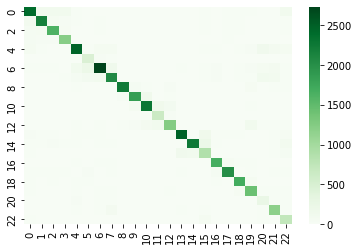

In [5]:
sn.heatmap(confusion_matrix, cmap='Greens', annot=False)

<AxesSubplot:>

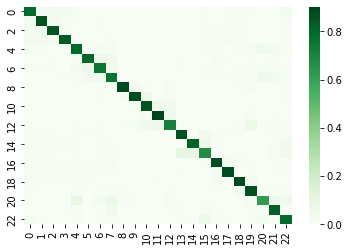

In [10]:
# use relative proportions instead of absolute values
sn.heatmap([[confusion_matrix[i][j] / sum(confusion_matrix[i]) for j in range(len(confusion_matrix[i]))] for i in range(len(confusion_matrix))], cmap='Greens', annot=False)